# Methodology to generate boxplots for full lifecycle costs from CACTUS database

## 1. Define 10 patterns of CACTUS components' combinations. Every pattern should be consist of 3 to 4 components over the sanitation value chain as follows.

  - containment, emptying, transporting and treatment
  - containment, emptying and transport, treatment
## 2. Extract TACH values for each component and summing full lifecycle costs for all combinations for each pattern defined in step 1 

  - Firstly, extract all tach values by specific component for each sanitation value chain defined by step 1. 
  - Secondly, generate cartesian products by combining extract TACH values.
  - Then, summing full lifecycle cost for each cartesian product. The summed value will be rounded before drawing boxplots.
  
For example, the following three components have three data points each in the database.
    
   - Infiltrating pit = [61.9166934, 32.27055505, 84.29846149]
   - Wheels - Machine Powered = [11.17640888, 104.164481, 22.8995304]
   - Machine-powered aerobic waste water = [131.7378863, 72.73530248, 115.1414926]
   
The total of 27 cartesian products will be generated by the above three components values. Then, summing total value for each cartesian product to get the list of full lifecycle costs over the value chain.

The example of simplified source code to do this is as follows: 

In [1]:
import itertools

containment = [61.9166934, 32.27055505, 84.29846149]
e_and_t = [11.17640888, 104.164481, 22.8995304]
treatment = [131.7378863, 72.73530248, 115.1414926]

combinations = list(itertools.product(containment, e_and_t, treatment))

print(f'The result of cartesian products ({len(combinations)} combinations):')
for product in combinations:
    total = round(sum(product), 0)
    print(f" values: {', '.join(map(str, product))}, total: {total}")
    
sum_array = [round(sum(combination),0) for combination in combinations]  
sum_array = list(set(sum_array))

print(f"result: {', '.join(map(str, sum_array))}")

The result of cartesian products (27 combinations):
 values: 61.9166934, 11.17640888, 131.7378863, total: 205.0
 values: 61.9166934, 11.17640888, 72.73530248, total: 146.0
 values: 61.9166934, 11.17640888, 115.1414926, total: 188.0
 values: 61.9166934, 104.164481, 131.7378863, total: 298.0
 values: 61.9166934, 104.164481, 72.73530248, total: 239.0
 values: 61.9166934, 104.164481, 115.1414926, total: 281.0
 values: 61.9166934, 22.8995304, 131.7378863, total: 217.0
 values: 61.9166934, 22.8995304, 72.73530248, total: 158.0
 values: 61.9166934, 22.8995304, 115.1414926, total: 200.0
 values: 32.27055505, 11.17640888, 131.7378863, total: 175.0
 values: 32.27055505, 11.17640888, 72.73530248, total: 116.0
 values: 32.27055505, 11.17640888, 115.1414926, total: 159.0
 values: 32.27055505, 104.164481, 131.7378863, total: 268.0
 values: 32.27055505, 104.164481, 72.73530248, total: 209.0
 values: 32.27055505, 104.164481, 115.1414926, total: 252.0
 values: 32.27055505, 22.8995304, 131.7378863, tota

## 3. Draw boxplots from the result of step 3

Using the values calculated in step 3 to draw a boxplot, and repeat drawing for each pattern of step 1.

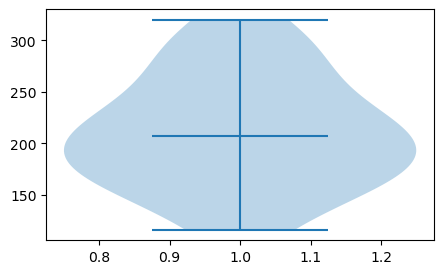

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))

bp = ax.violinplot(
            sum_array, 
            showmeans=False, 
            showmedians = True,
        )

# Actual drawing process of boxplots start from here

## Common variables for figure

In [3]:
# variables
path_excel = r'data.xlsx'
sheet_name = 'cactus_data'
file_path = 'images/Figure1 fulllifecycle_cost_comparison_global.pdf'
dpi = 700

labelFontSize = 18
legendFontSize = 20

ytickLabel = 'Total Annualised Cost per Household (TACH) Int$ (2020)'
ytick_range = [
    0,    # min
    6300, # max
    500   # interval
]

colors = [
    '#FFD580', # light orange color
    '#90EE90', # light green color
]

## 1. Define 10 patterns of CACTUS components' combinations. Every pattern should be consist of 3 to 4 components over the sanitation value chain

In [4]:
combinations = [
    [ 
        'Infiltrating pit', 
        None, 
        'Wheels - Machine Powered', 
        'Machine-powered aerobic waste water',
        'Infiltrating pit, Wheels - Machine Powered, Machine-powered aerobic waste water',
        colors[0]
    ],
    [ 
        'Infiltrating pit', 
        None, 
        'Wheels - Machine Powered', 
        'Passive aerobic waste water',
        'Infiltrating pit, Wheels - Machine Powered, Passive aerobic waste water',
        colors[1]
    ],
    [ 
        'Sealed tank without infiltration structure', 
        None, 
        'Wheels - Machine Powered', 
        'Machine-powered aerobic waste water',
        'Sealed tank without infiltration structure, Wheels - Machine Powered, Machine-powered aerobic waste water',
        colors[0]
    ],
    [ 
        'Sealed tank without infiltration structure', 
        None, 
        'Wheels - Machine Powered', 
        'Passive aerobic waste water',
        'Sealed tank without infiltration structure, Wheels - Machine Powered, Passive aerobic waste water',
        colors[1]
    ],
    [ 
        'Direct', 
        None, 
        'Pipes - conventional, combined, with pumping', 
        'Machine-powered aerobic waste water',
        'Direct, Conventional pipes combined with pumping, Machine-powered aerobic waste water',
        colors[0]
    ],
    [ 
        'Direct', 
        None, 
        'Pipes - conventional, combined, with pumping', 
        'Passive aerobic waste water',
        'Direct, Conventional pipes combined with pumping, Passive aerobic waste water',
        colors[1]
    ],
    # note. the following two combinations does not have actual data for combined converntional pipe without pumping in the database.
    [ 
        'Direct', 
        None, 
        'Pipes - conventional, separate, no pumping', 
        'Machine-powered aerobic waste water',
        'Direct, Conventional pipes separate without pumping, Machine-powered aerobic waste water',
        colors[0]
    ],
    [ 
        'Direct', 
        None, 
        'Pipes - conventional, separate, no pumping', 
        'Passive aerobic waste water',
        'Direct, Conventional pipes separate without pumping, Passive aerobic waste water',
        colors[1]
    ],
    [ 
        'Direct', 
        None, 
        'Pipes - conventional, separate, with pumping', 
        'Machine-powered aerobic waste water',
        'Direct, Conventional pipes separate with pumping, Machine-powered aerobic waste water',
        colors[0]
    ],
    [ 
        'Direct', 
        None, 
        'Pipes - conventional, separate, with pumping', 
        'Passive aerobic waste water',
        'Direct, Conventional pipes separate with pumping, Passive aerobic waste water',
        colors[1]
    ],
]

## Importing requires python packages

In [5]:
import pandas as pd
import itertools
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.text import Text
import textwrap
import matplotlib.patches as mpatches
from matplotlib.path import Path

## Define python functions

### Function 1) Defining the function to get all TACHs by filtering the given component name

In [6]:
def getTachsByComponentName(df, name):
    """
    get all TACHs by filtering the given component name
    
    Parameters
    ----------
    df : dataframe
    name: component name
    
    Returns
    -------
        the list of TACH values for the given component
    """
    if not name:
        return []
    filter = df.component == name
#     values = list(df[filter]['tach'])

    filtered_df = df[filter]
    # Calculate the IQR for the 'tach' column
    q1 = filtered_df['tach'].quantile(0.25)
    q3 = filtered_df['tach'].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for values within the IQR
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the 'tach' values within the IQR bounds
    values = filtered_df[(filtered_df['tach'] >= lower_bound) & (filtered_df['tach'] <= upper_bound)]['tach']

    return values

### Function 2)  Defining the function to estimate lifecycle cost by given combination of CACTUS components

This function is going to estimate full lifecycle cost by the givern component names (containment, emptying, transporting and treatment)
- extract the list of TACH values by component names
- generate cartesian products by all list of values of three to four components.
- estimate SUM value for each combination

In [7]:
def getLifecycleCostsbyCombination(df, container_name, emptying_name, transport_name, treatment_name, label, color):
    """
    Estimate lifecycle cost by given combination of CACTUS components
    
    Parameters
    ----------
    df : dataframe
    container_name: container component name
    emptying_name: emptying component name (if no, set NULL)
    transport_name: transport component name (or E&T component name)
    treatment_name: treatment component name
    label: label to be appeared in figure
    color: color for boxplot
    
    Returns
    -------
        returns the dataframe of containing data label and full lifecycle cost values
    """
    # extract the list of TACH values by component names
    container = getTachsByComponentName(df, container_name)
    transport = getTachsByComponentName(df, transport_name)
    treatment = getTachsByComponentName(df, treatment_name)

    # generate cartesian products by all list of values of three to four components.
    if emptying_name:
        emptying = getTachsByComponentName(df, emptying_name)
        
        if len(transport) > 0:
            combinations = list(itertools.product(container, emptying, transport, treatment))  
        else:
            combinations = list(itertools.product(container, emptying, treatment))  
    else:
        if len(transport) > 0:
            combinations = list(itertools.product(container, transport, treatment))
        else:
            combinations = list(itertools.product(container, treatment))
        
    # estimate SUM value for each combination
    sum_array = [round(sum(combination),0) for combination in combinations]  
    sum_array = list(set(sum_array))
    
    # set label in dataframe
    if label:
        name = label
    else:
        if emptying_name:
            name = f"{container_name}, {emptying_name}, {transport_name} and {treatment_name}"
        else:
            name = f"{container_name}, {transport_name} and {treatment_name}"
    names = np.full(len(sum_array), name)
    
    result_df = pd.DataFrame({'name': names, 'tach': sum_array, 'color': color})

    return result_df

### Function 3) Defining the function to show data label

In [8]:
def showLabel(ax, x, y, value):
    """
    Draw data label in the givern X/Y coordinates on the canvas
    
    Parameters
    ----------
    ax : figure canvas object
    x: x coordinate
    y: y coordinate
    value: data value to be shown as label
    """
    ax.text(x, y, f"{value:.0f}", ha='center', va='center', fontsize=14)

### Function 4) Defining the function to draw boxplot in canvas

In [9]:
def drawBoxplot(ax, tachs, position, color, showmeans=True, showfliers=False):
    """
    Draw boxplot by given TACH values in the specified position
    
    Parameters
    ----------
    ax : figure canvas object
    tachs: the list of TACH values
    position: the integer value for the position to draw boxplot
    color: color of boxplot. eg., 'red', 'blue', etc.
    showmeans: show means in boxplot
    showfliers: show outlier values in boxplot
    """
    
    size = len(tachs)
    linestyle = '-'

    if size == 1:
        # If only has 1 value, plot it as marker
        ax.plot(position, tachs, marker='o', color='k', markersize=6)
    else:
        # draw box plots if it has more than two values
        violin = ax.violinplot(
            tachs, 
            showmeans=False,
            showmedians=True,
            positions=[position],
        )
        
        for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
            vp = violin[partname]
            vp.set_edgecolor("black")
            vp.set_linewidth(1)
        
        for pc in violin['bodies']:
            pc.set_facecolor(color)
            pc.set_edgecolor(color)
        

## Read the data from EXCEL sheet

In [10]:
df_all = pd.read_excel(
    path_excel, 
    sheet_name=sheet_name,
)

## 2. Extract TACH values for each component and summing full lifecycle costs for all combinations for each pattern defined in step 1 

In [11]:
dfs = []
for combination in combinations:
#     df_original = combination[0]
    container = combination[0]
    emptying = combination[1]
    transport = combination[2]
    treatment = combination[3]
    label = combination[4]
    color = combination[5]

    df_combination = getLifecycleCostsbyCombination(
        df_all, 
        container, 
        emptying, 
        transport, 
        treatment, 
        label, 
        color)
    
    print(f"{label}: {len(df_combination)} values")
    
    dfs.append(df_combination)

Infiltrating pit, Wheels - Machine Powered, Machine-powered aerobic waste water: 1030 values
Infiltrating pit, Wheels - Machine Powered, Passive aerobic waste water: 938 values
Sealed tank without infiltration structure, Wheels - Machine Powered, Machine-powered aerobic waste water: 407 values
Sealed tank without infiltration structure, Wheels - Machine Powered, Passive aerobic waste water: 443 values
Direct, Conventional pipes combined with pumping, Machine-powered aerobic waste water: 462 values
Direct, Conventional pipes combined with pumping, Passive aerobic waste water: 329 values
Direct, Conventional pipes separate without pumping, Machine-powered aerobic waste water: 186 values
Direct, Conventional pipes separate without pumping, Passive aerobic waste water: 115 values
Direct, Conventional pipes separate with pumping, Machine-powered aerobic waste water: 412 values
Direct, Conventional pipes separate with pumping, Passive aerobic waste water: 294 values


### 2.1 Join all 10 dataframes into one dataframe

In [12]:
df = pd.concat(dfs, axis=0)
print(df)

                                                  name    tach    color
0    Infiltrating pit, Wheels - Machine Powered, Ma...    87.0  #FFD580
1    Infiltrating pit, Wheels - Machine Powered, Ma...    90.0  #FFD580
2    Infiltrating pit, Wheels - Machine Powered, Ma...    92.0  #FFD580
3    Infiltrating pit, Wheels - Machine Powered, Ma...    96.0  #FFD580
4    Infiltrating pit, Wheels - Machine Powered, Ma...    97.0  #FFD580
..                                                 ...     ...      ...
289  Direct, Conventional pipes separate with pumpi...   500.0  #90EE90
290  Direct, Conventional pipes separate with pumpi...  1016.0  #90EE90
291  Direct, Conventional pipes separate with pumpi...   507.0  #90EE90
292  Direct, Conventional pipes separate with pumpi...   508.0  #90EE90
293  Direct, Conventional pipes separate with pumpi...  1023.0  #90EE90

[4616 rows x 3 columns]


### 2.2 Extract group labels from dataframe

In [13]:
groups = df.groupby('name', sort=False)
group_labels = list(groups.groups.keys())

print(f"The following {len(group_labels)} combinations' full lifecycle costs will be included:")
for index, label in enumerate(group_labels, start=1):
    group_size = groups.get_group(label).shape[0]
    print(f"{index}: {label} - {group_size} values")

The following 10 combinations' full lifecycle costs will be included:
1: Infiltrating pit, Wheels - Machine Powered, Machine-powered aerobic waste water - 1030 values
2: Infiltrating pit, Wheels - Machine Powered, Passive aerobic waste water - 938 values
3: Sealed tank without infiltration structure, Wheels - Machine Powered, Machine-powered aerobic waste water - 407 values
4: Sealed tank without infiltration structure, Wheels - Machine Powered, Passive aerobic waste water - 443 values
5: Direct, Conventional pipes combined with pumping, Machine-powered aerobic waste water - 462 values
6: Direct, Conventional pipes combined with pumping, Passive aerobic waste water - 329 values
7: Direct, Conventional pipes separate without pumping, Machine-powered aerobic waste water - 186 values
8: Direct, Conventional pipes separate without pumping, Passive aerobic waste water - 115 values
9: Direct, Conventional pipes separate with pumping, Machine-powered aerobic waste water - 412 values
10: Direc

## 3. Draw boxplots from the result of step 3

1: Draw 1030 of TACH values for Infiltrating pit, Wheels - Machine Powered, Machine-powered aerobic waste water
2: Draw 938 of TACH values for Infiltrating pit, Wheels - Machine Powered, Passive aerobic waste water
3: Draw 407 of TACH values for Sealed tank without infiltration structure, Wheels - Machine Powered, Machine-powered aerobic waste water
4: Draw 443 of TACH values for Sealed tank without infiltration structure, Wheels - Machine Powered, Passive aerobic waste water
5: Draw 462 of TACH values for Direct, Conventional pipes combined with pumping, Machine-powered aerobic waste water
6: Draw 329 of TACH values for Direct, Conventional pipes combined with pumping, Passive aerobic waste water
7: Draw 186 of TACH values for Direct, Conventional pipes separate without pumping, Machine-powered aerobic waste water
8: Draw 115 of TACH values for Direct, Conventional pipes separate without pumping, Passive aerobic waste water
9: Draw 412 of TACH values for Direct, Conventional pipes sep

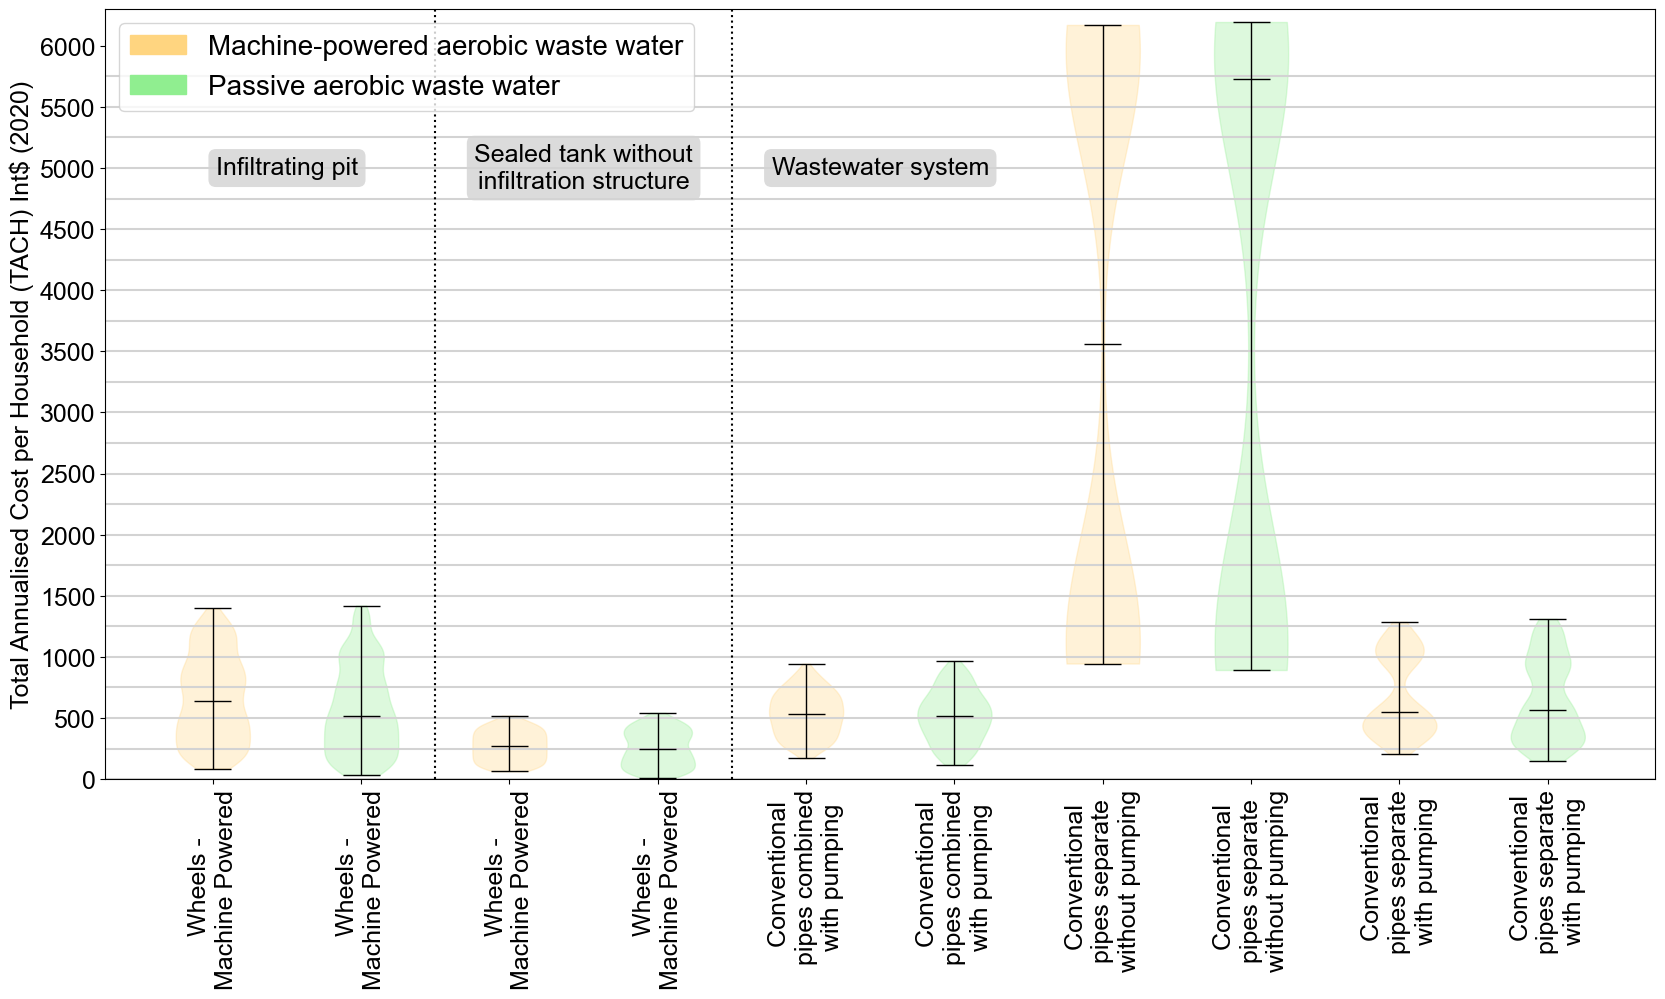

In [16]:
# create canvas to draw figure
fig, ax = plt.subplots(figsize=(20, 10))

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18

# put background color as white
fig.patch.set_facecolor('white') 

# set Y axis ranges
ax.set_ylim(ytick_range[0], ytick_range[1])  
ax.set_yticks(np.arange(ytick_range[0], ytick_range[1],ytick_range[2]))

# draw horizontal lines for each 250 Int$
for ylabel in np.arange(0,6000,250):
    ax.axhline(y=ylabel, color='lightgray')

ax.axvline(x=2.5, color='k', linestyle=':')
ax.axvline(x=4.5, color='k', linestyle=':')
    
# Loop by the above 10 groups
for j, group in enumerate(groups):
    label = group_labels[j]
    tachs = group[1]['tach']
    color = group[1]['color'][0]
    position = j + 1
    print(f"{position}: Draw {len(tachs)} of TACH values for {label}")
    drawBoxplot(ax, tachs, position, color)

# draw labels for yticks
ax.set_ylabel(ytickLabel, fontsize=labelFontSize)

    
# draw labels for xticks.
# only show emptying & tranport in x axis label
xtick_labels = [ '\n'.join(textwrap.wrap(label.split(',')[1], 15)) for label in group_labels ]
ax.set_xticks(np.arange(len(xtick_labels)) + 1)
ax.set_xticklabels(xtick_labels,  rotation=90, ha='center', fontsize=labelFontSize)

ax.text(1.5, 5000, 'Infiltrating pit', fontsize=18, ha='center', va='center', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.8, boxstyle='round'))
ax.text(3.5, 5000, 'Sealed tank without\ninfiltration structure', fontsize=18, ha='center', va='center', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.8, boxstyle='round'))
ax.text(5.5, 5000, 'Wastewater system', fontsize=18, ha='center', va='center', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.8, boxstyle='round'))


# draw legend
legend_labels = [
    'Machine-powered aerobic waste water',
    'Passive aerobic waste water'
]
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
ax.legend(handles=legend_patches, loc='upper left', fontsize=legendFontSize)

# save figures as PDF and PNG
plt.savefig(file_path, format="pdf", dpi=dpi, transparent=True, bbox_inches='tight')
plt.savefig(f"{file_path}.png", format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show()